In [222]:
import pandas as pd

In [223]:
df = pd.read_csv('/content/jogja_.csv')

In [224]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 75 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   lokasi                                               1495 non-null   object 
 1   harga                                                1495 non-null   float64
 2   kamar_tidur                                          1495 non-null   int64  
 3   bangunan                                             1495 non-null   int64  
 4   lahan                                                1492 non-null   float64
 5   alamat                                               1495 non-null   object 
 6   kamar_mandi                                          1495 non-null   int64  
 7   sistem_alarm                                         1495 non-null   object 
 8   gym                                                  1495 non-null  

In [226]:
df.isnull().sum()

lokasi               0
harga                0
kamar_tidur          0
bangunan             0
lahan                3
                    ..
sman_3_yogyakarta    0
jenis_rumah          0
kategori             0
latitude             0
longitude            0
Length: 75, dtype: int64

In [227]:
df = df.dropna()

In [228]:
df.isna().sum()

lokasi               0
harga                0
kamar_tidur          0
bangunan             0
lahan                0
                    ..
sman_3_yogyakarta    0
jenis_rumah          0
kategori             0
latitude             0
longitude            0
Length: 75, dtype: int64

In [229]:
df.duplicated().sum()

77

In [230]:
df = df.drop_duplicates()

In [231]:
df.duplicated().sum()

0

In [232]:
df.describe()

,harga,kamar_tidur,bangunan,lahan,kamar_mandi,latitude,longitude
count,1.415000e+03,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000
mean,3.420178e+09,5.193640,213.683392,295.423322,3.609187,-7.813285,110.376882
std,9.473758e+09,10.101428,239.917814,953.010189,5.387323,0.040632,0.025195
min,1.189210e+08,1.000000,1.000000,45.000000,1.000000,-8.035127,110.350447
25%,8.890000e+08,3.000000,80.000000,108.000000,2.000000,-7.818068,110.359723
50%,1.700000e+09,4.000000,150.000000,150.000000,3.000000,-7.814378,110.372558
75%,3.000000e+09,5.000000,256.500000,315.000000,4.000000,-7.801195,110.387374
max,3.000000e+11,325.000000,4006.000000,34000.000000,150.000000,-7.780455,110.490835


In [233]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [234]:
def format_price(value,pos):
  milyar = '{:.1f}B'.format(value * 1e-9) if value >= 1e9 else ''
  juta = '{:.1f}M'.format(value * 1e-6) if 1e6 <= value <= 1e9 else ''
  ribu = '{:.1f}K'.format(value * 1e-3) if 1e3 <= value < 1e6 else ''

  return '{}{}{}'.format(milyar,juta,ribu)

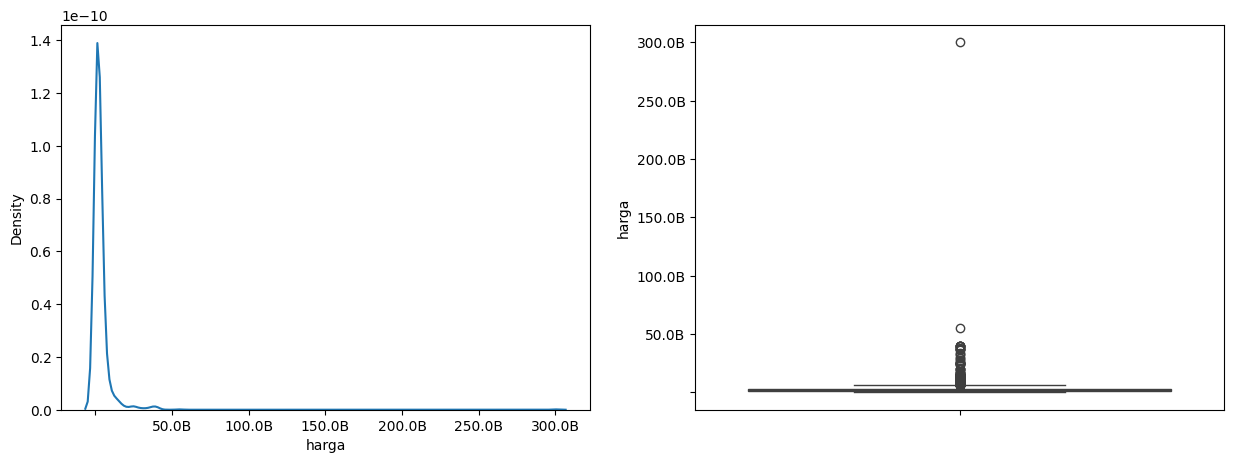

In [235]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(df['harga'])
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_price))
# plt.gca().yaxis.set_major_formatter(FuncFormatter(format_price))
plt.subplot(1,2,2)
sns.boxplot(df['harga'])
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_price))
plt.show()

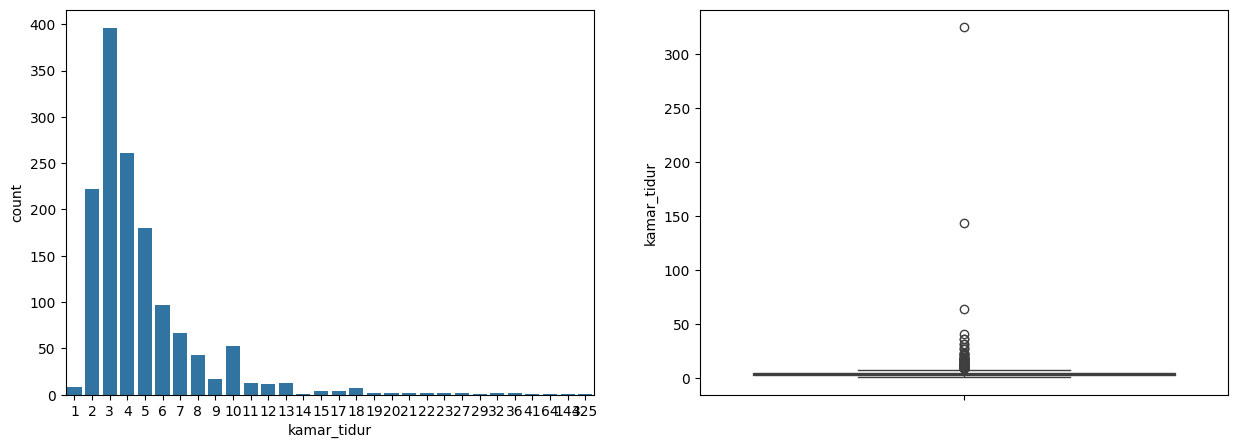

In [236]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x='kamar_tidur')
plt.subplot(1,2,2)
sns.boxplot(df['kamar_tidur'])
plt.show()

In [237]:
import plotly.express as px

In [238]:
fig = px.scatter(df,x='kamar_tidur',y='harga',
                 title='Kamar Tidur dan Harga',
                 color='harga')
fig.show()

In [239]:
df[df['kamar_tidur']>300]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband_wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j_walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
1034,Jetis,3.000000e+09,325,263,325.0,"Jalan A M Sangaji, Yogyakarta, Indonesia ...",5,N,N,Y,...,N,N,N,N,N,N,rumah biasa,premium,-8.035127,110.490835


In [240]:
median_value = df['kamar_tidur'].median()
median_value

4.0

In [241]:
idx = df[df['kamar_tidur'] == 325].index
df.loc[idx, 'kamar_tidur'] = median_value

In [242]:
df[df['kamar_tidur']> 140]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband_wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j_walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
119,Gondomanan,3.000000e+11,144,1971,1971.0,malioboro yogykarta ...,150,Y,Y,Y,...,N,N,N,N,N,N,rumah biasa,biasa,-7.802395,110.366112


In [243]:
idx = df[df['kamar_tidur'] == 144].index
df = df.drop([119])

In [244]:
df[df['kamar_tidur'] > 50]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband_wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j_walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
1326,Mantrijeron,1.250000e+10,64,2000,850.0,Jalan Mantrijeron ...,64,N,N,Y,...,N,N,N,N,N,N,kost,biasa,-7.818068,110.359723


In [245]:
idx = df[df['kamar_tidur'] == 64].index
df = df.drop([1326])

In [247]:
df[df['kamar_tidur'] > 40]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband_wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j_walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
806,Umbulharjo,2.500000e+10,41,2900,2084.0,"Pandeyan Kel., Umbulharjo, Yogyakarta, Indones...",43,Y,N,Y,...,N,N,N,N,N,N,rumah biasa,biasa,-7.814378,110.387374


In [248]:
idx = df[df['kamar_tidur'] == 41].index
df = df.drop([806])

In [249]:
df[df['kamar_tidur'] > 25]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband_wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j_walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
52,Umbulharjo,7.200000e+09,32,342,695.0,"Umbulharjo, Yogyakarta, Indonesia ...",7,N,N,Y,...,N,N,N,N,N,N,rumah biasa,biasa,-7.814378,110.387374
53,Umbulharjo,5.400000e+09,27,902,445.0,"Umbulharjo, Yogyakarta, Indonesia ...",18,N,N,Y,...,N,N,N,N,N,N,penginapan,biasa,-7.814378,110.387374
434,Yogyakarta,5.900000e+09,36,303,1016.0,Yogyakarta,36,N,N,N,...,N,N,N,N,N,N,kost,biasa,-7.801195,110.364917
454,Wirobrajan,5.500000e+10,36,1200,1900.0,"Pringgokusuman Kel., Gedong Tengen, Yogyakarta...",38,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.802624,110.350447
517,Tegalrejo,7.200000e+09,32,343,695.0,"Tegalrejo, Yogyakarta, Indonesia ...",7,N,N,Y,...,N,N,N,N,N,N,rumah biasa,biasa,-7.780455,110.355073
519,Tegalrejo,5.400000e+09,27,907,453.0,"Tegalrejo, Yogyakarta, Indonesia ...",18,N,N,Y,...,N,N,N,N,N,N,penginapan,biasa,-7.780455,110.355073
1215,Gondokusuman,8.000000e+09,29,700,736.0,"Jalan Terban, Yogyakarta 55223, Indonesia ...",27,N,N,Y,...,N,N,N,N,N,N,kost,biasa,-7.786744,110.381000


In [250]:
idx = df[df['kamar_tidur'] > 25].index
df = df.drop([52,53,434,454,517,519,1215])

In [251]:
df[df['kamar_tidur'] == 1]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband_wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j_walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
428,Umbulharjo,2.300000e+09,1,220,393.0,"586H+PC Bangunjiwo, Kabupaten Bantul, Daerah I...",1,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.814378,110.387374
452,Mergangsan,2.300000e+09,1,220,393.0,"586H+PC Bangunjiwo, Kabupaten Bantul, Daerah I...",1,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.814734,110.372558
653,Wirobrajan,2.500000e+09,1,150,76.0,"Jalan KH Ahmad Dahlan, Yogyakarta, Indonesia ...",3,N,N,N,...,N,N,N,N,N,Y,ruko,biasa,-7.802624,110.350447
835,Mergangsan,2.300000e+09,1,220,393.0,"59RH+Q3 Wirogunan, Kota Yogyakarta, Daerah Ist...",1,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.814734,110.372558
874,Jetis,2.600000e+09,1,623,711.0,Rumah dan Toko Untuk Usaha di Jalan Cokrokusum...,1,N,N,N,...,N,N,N,N,N,N,ruko,biasa,-8.035127,110.490835
978,Yogyakarta,1.800000e+08,1,21,60.0,Yogyakarta,1,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.801195,110.364917
1167,Yogyakarta,1.800000e+08,1,21,60.0,Manisrenggo ...,1,N,N,N,...,N,N,N,N,N,N,perumahan,biasa,-7.801195,110.364917
1176,Kotagede,1.550000e+08,1,120,120.0,"Kotagede, Yogyakarta",1,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.818311,110.397941


In [252]:
idx = df[df['kamar_tidur'] == 1].index
df = df.drop([1176])

In [253]:
idx = df[df['kamar_tidur'] == 1].index
df = df.drop([978,1167])

In [254]:
df[df['kamar_tidur'] > 15]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband_wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j_walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
51,Umbulharjo,1.000000e+10,23,693,745.0,"Umbulharjo, Yogyakarta, Indonesia ...",23,N,N,Y,...,N,N,N,N,N,N,kost,biasa,-7.814378,110.387374
187,Umbulharjo,5.000000e+09,18,2,431.0,"Umbulharjo, Yogyakarta",18,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.814378,110.387374
286,Kotagede,1.250000e+10,17,803,1095.0,"Kotagede, Yogyakarta, Indonesia ...",20,N,N,Y,...,N,N,N,N,N,N,rumah biasa,biasa,-7.818311,110.397941
299,Gondomanan,6.500000e+09,17,411,453.0,"Gondomanan, Yogyakarta, Indonesia ...",17,N,N,Y,...,N,N,N,N,N,Y,penginapan,biasa,-7.802395,110.366112
300,Gondomanan,5.000000e+09,22,503,317.0,"Gondomanan, Yogyakarta, Indonesia ...",22,N,N,Y,...,N,N,N,N,N,Y,kost,biasa,-7.802395,110.366112
435,Yogyakarta,5.500000e+09,18,250,209.0,Yogyakarta,18,N,N,N,...,N,N,N,N,N,N,kost,biasa,-7.801195,110.364917
516,Tegalrejo,1.000000e+10,23,692,745.0,"Tegalrejo, Yogyakarta, Indonesia ...",23,N,N,Y,...,N,N,N,N,N,N,kost,biasa,-7.780455,110.355073
547,Gondokusuman,2.500000e+09,18,350,285.0,"Jalan Sagan, Terban Kel., Gondokusuman, Yogyak...",4,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.786744,110.381000
654,Gondokusuman,6.500000e+09,18,600,525.0,"Baciro Kel., Gondokusuman, Yogyakarta, Indones...",7,N,N,Y,...,N,N,N,N,N,N,kost,biasa,-7.786744,110.381000
669,Gondokusuman,2.000000e+10,18,700,895.0,"Jalan Sagan, Terban Kel., Gondokusuman, Yogyak...",16,N,N,Y,...,N,N,N,N,N,N,kost,biasa,-7.786744,110.381000


In [255]:
idx = df[df['kamar_tidur'] > 15].index
df = df.drop([51,187,286,299,300,435,516,547,654,669,670,676,842,1101,1180,1309,1313,1325,1375,1413,1444])

In [256]:
fig = px.scatter(df,x='kamar_tidur',y='harga',
                 title='Kamar Tidur dan Harga',
                 color='harga')
fig.show()

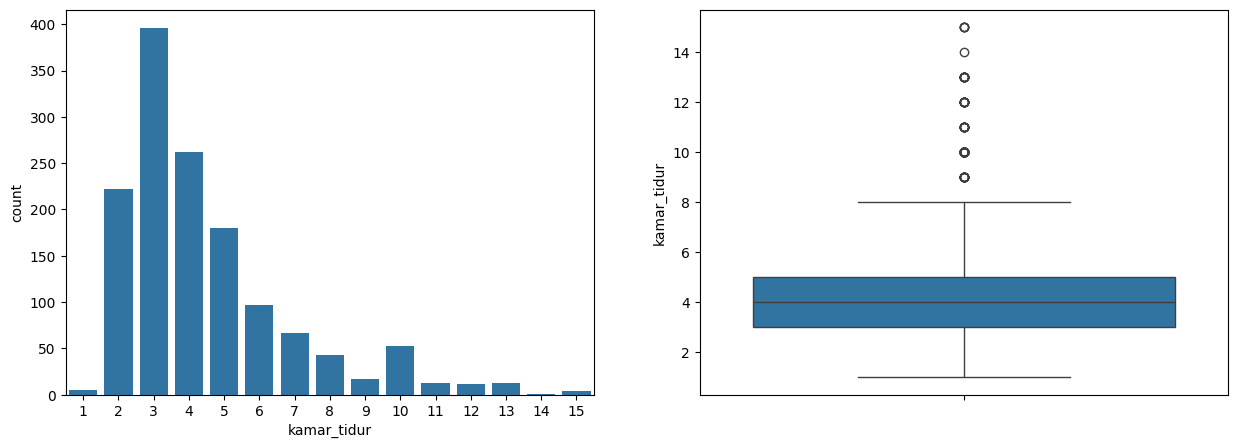

In [257]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x='kamar_tidur')
plt.subplot(1,2,2)
sns.boxplot(df['kamar_tidur'])
plt.show()

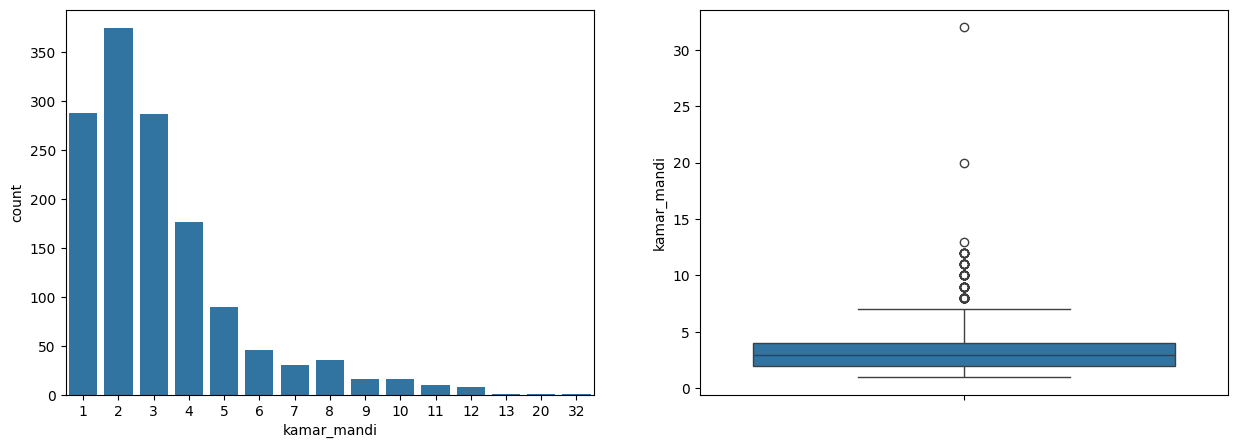

In [258]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x='kamar_mandi')
plt.subplot(1,2,2)
sns.boxplot(df['kamar_mandi'])
plt.show()

In [259]:
fig = px.scatter(df,x='kamar_mandi',y='harga',
                 title='Kamar mandi dan Harga',
                 color='harga')
fig.show()

In [260]:
df[df['kamar_mandi']== 32 ]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband_wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j_walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
590,Tegalrejo,1.500000e+09,5,250,150.0,"Tegalrejo, Yogyakarta",32,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.780455,110.355073


In [261]:
idx = df[df['kamar_mandi'] == 32].index
df = df.drop([590])

In [262]:
df[df['kamar_mandi'] > 13 ]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband_wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j_walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
110,Umbulharjo,7.000000e+09,15,700,300.0,Umbulharjo yogyakarta ...,20,N,N,Y,...,N,N,N,N,N,N,rumah biasa,biasa,-7.814378,110.387374


In [263]:
idx = df[df['kamar_mandi'] > 13].index
df = df.drop([110])

In [264]:
df[df['kamar_mandi']==13]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband_wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j_walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
960,Mergangsan,5.500000e+09,12,300,525.0,"Brontokusuman Kel., Mergangsan, Yogyakarta, In...",13,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.814734,110.372558


In [265]:
idx = df[df['kamar_mandi'] == 13].index
df = df.drop([960])

In [266]:
fig = px.scatter(df,x='kamar_mandi',y='harga',
                 title='Kamar mandi dan Harga',
                 color='harga')
fig.show()

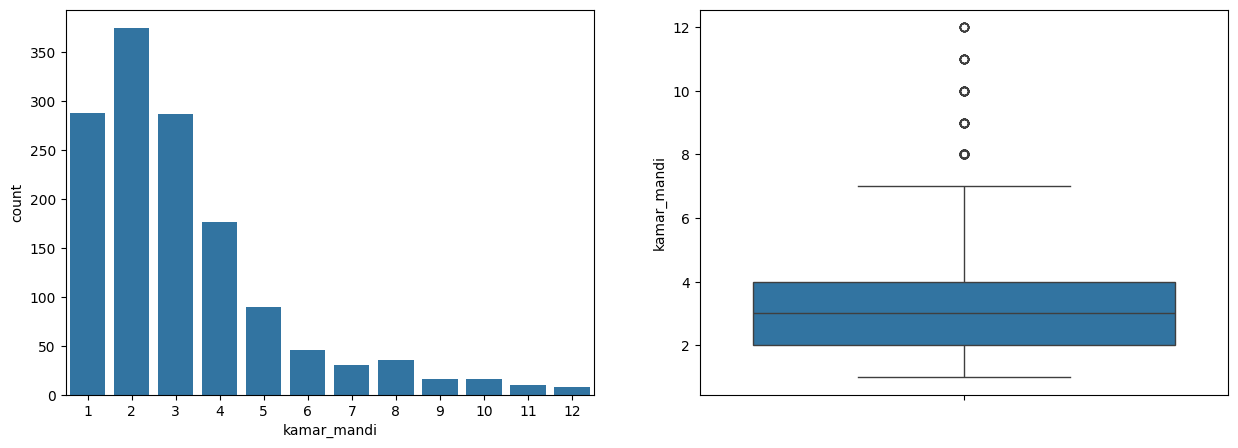

In [267]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x='kamar_mandi')
plt.subplot(1,2,2)
sns.boxplot(df['kamar_mandi'])
plt.show()

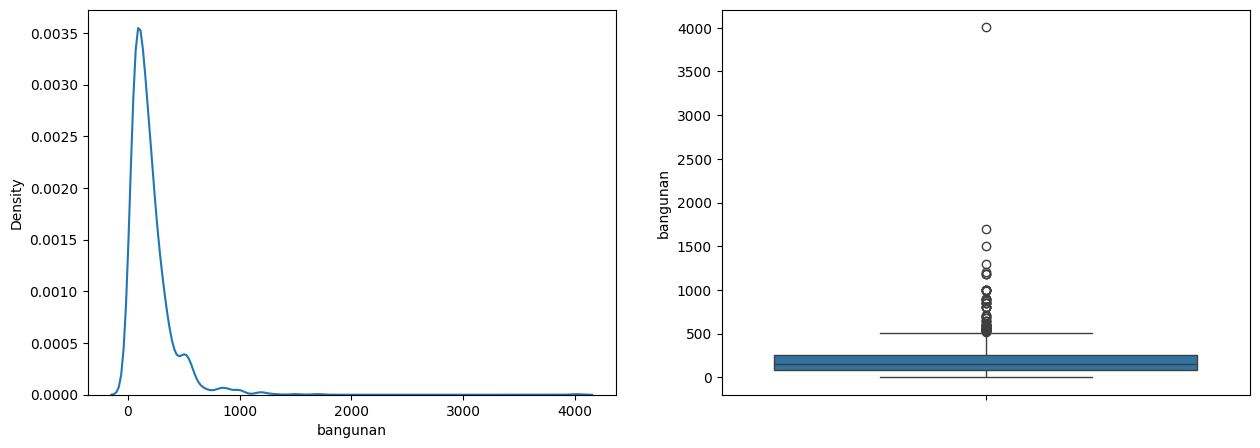

In [268]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(df['bangunan'])
plt.subplot(1,2,2)
sns.boxplot(df['bangunan'])
plt.show()

In [269]:
fig = px.scatter(df,x='bangunan',y='harga',
                 title='Bangunan dan Harga',
                 color='harga')
fig.show()

In [270]:
df[df['bangunan']== 4006 ]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband_wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j_walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
565,Yogyakarta,6.902500e+09,4,4006,1255.0,"Dekat Soto Sapi Mbah Guno, Jl. Wonosari No.KM,...",2,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.801195,110.364917


In [271]:
idx = df[df['kamar_mandi'] == 4006 ].index
df = df.drop([565])

In [272]:
df[df['bangunan'] < 20]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband_wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j_walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
136,Umbulharjo,5.250000e+08,3,1,75.0,"Umbulharjo, Yogyakarta",2,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.814378,110.387374
159,Umbulharjo,1.200000e+09,10,2,228.0,"Umbulharjo, Yogyakarta",5,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.814378,110.387374
160,Jetis,3.500000e+08,3,2,63.0,"Jetis, Yogyakarta",2,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-8.035127,110.490835
168,Mantrijeron,2.100000e+09,3,1,190.0,"Mantrijeron, Yogyakarta",2,N,N,N,...,N,N,N,N,N,N,ruko,biasa,-7.818068,110.359723
203,Kotagede,4.500000e+08,10,1,111.0,"Gang Manuk Beri, Rejowinangun Kel., Kotagede, ...",10,N,N,Y,...,N,N,N,N,N,N,kost,biasa,-7.818311,110.397941
204,Wirobrajan,7.500000e+08,5,2,92.0,"Wirobrajan, Yogyakarta",2,N,N,N,...,N,N,N,N,N,N,kost,biasa,-7.802624,110.350447
265,Wirobrajan,4.665000e+08,2,1,76.0,"Umbulmartani Kel., Ngemplak, Sleman, Indonesia...",1,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.802624,110.350447
837,Kotagede,6.900000e+08,2,1,111.0,"Rejowinangun Kel., Kotagede, Yogyakarta, Indon...",1,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.818311,110.397941
1076,Yogyakarta,1.950000e+09,3,1,148.0,Yogyakarta,2,N,Y,N,...,N,N,N,N,N,N,rumah biasa,premium,-7.801195,110.364917
1476,Mergangsan,9.100000e+08,3,2,70.0,"Mergangsan, Yogyakarta",2,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.814734,110.372558


In [273]:
median_value = df['bangunan'].median()
median_value

150.0

In [274]:
idx = df[df['bangunan'] < 20].index
df.loc[idx, 'bangunan'] = median_value

In [275]:
df[df['bangunan'] >= 1000]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband_wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j_walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
131,Gondokusuman,4.000000e+10,13,1185,1000.0,"Kotabaru Kel., Gondokusuman, Yogyakarta, Indon...",7,N,N,N,...,N,N,N,N,N,N,kantor,biasa,-7.786744,110.381000
163,Gondokusuman,1.300000e+10,10,1700,2650.0,"Gondokusuman, Yogyakarta",10,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.786744,110.381000
643,Pakualaman,3.700000e+10,8,1500,2500.0,"Pakualaman, Yogyakarta",7,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.800434,110.376227
697,Gondokusuman,4.000000e+10,13,1185,996.0,"Jalan Jenderal Sudirman, Yogyakarta, Indonesia...",8,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.786744,110.381000
770,Gondokusuman,4.000000e+10,13,1185,996.0,"Gondokusuman, Yogyakarta, Indonesia ...",7,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.786744,110.381000
788,Mergangsan,1.350000e+10,14,1000,2455.0,"Mergangsan, Yogyakarta",6,N,N,N,...,N,N,N,N,N,N,kost,biasa,-7.814734,110.372558
993,Gondokusuman,4.000000e+10,9,1300,996.0,"Gondokusuman, Yogyakarta",6,N,N,N,...,N,N,N,N,N,N,kantor,biasa,-7.786744,110.381000
1056,Gondokusuman,3.999000e+09,6,1000,744.0,"Gondokusuman, Yogyakarta, Indonesia ...",6,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.786744,110.381000
1068,Yogyakarta,1.300000e+10,10,1200,455.0,Yogyakarta,9,N,N,N,...,N,N,N,N,N,N,kost,biasa,-7.801195,110.364917
1107,Gondokusuman,4.000000e+09,6,1000,744.0,Sapen Gondokusuman Yogyakarta ...,6,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.786744,110.381000


In [276]:
idx = df[df['bangunan'] >= 1000].index
df = df.drop([131,163,643,697,770,788,993,1056,1068,1107,1127,1361])

In [277]:
df[df['bangunan']>=800]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband_wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j_walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
189,Umbulharjo,3.200000e+10,4,800,2270.0,"Umbulharjo, Yogyakarta, Indonesia ...",4,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.814378,110.387374
561,Umbulharjo,1.850000e+10,12,900,2021.0,"Muja Muju Kel., Umbulharjo, Yogyakarta, Indone...",12,N,N,N,...,Y,N,N,N,N,N,rumah biasa,biasa,-7.814378,110.387374
614,Tegalrejo,1.499900e+10,7,850,1000.0,"Tegalrejo, Yogyakarta",7,N,N,Y,...,N,N,N,N,N,N,rumah biasa,biasa,-7.780455,110.355073
652,Gondokusuman,1.500000e+10,8,850,550.0,"Jalan Malioboro, Yogyakarta, Indonesia ...",6,Y,N,Y,...,N,N,N,N,N,N,rumah biasa,biasa,-7.786744,110.381000
707,Gondokusuman,7.000000e+09,10,800,711.0,"Gondokusuman, Yogyakarta",9,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.786744,110.381000
863,Gondokusuman,4.000000e+10,13,996,1185.0,"Gondokusuman, Yogyakarta",7,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.786744,110.381000
877,Jetis,1.300000e+10,5,850,550.0,"Jetis, Yogyakarta",3,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-8.035127,110.490835
925,Gondokusuman,3.660000e+10,8,850,1220.0,"Gondokusuman, Yogyakarta",5,N,N,N,...,N,N,N,N,N,N,penginapan,biasa,-7.786744,110.381000
1057,Gondokusuman,4.100000e+09,5,900,677.0,"Gondokusuman, Yogyakarta, Indonesia ...",5,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.786744,110.381000
1108,Gondokusuman,4.100000e+09,5,900,677.0,Sapen gondokusuman yogyakarta ...,5,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.786744,110.381000


In [278]:
idx = df[df['bangunan'] >= 800].index
df = df.drop([189,561,614,652,707,863,877,925,1057,1108,1203,1236,1261,1295,1372,1391,1440])

In [279]:
df[df['bangunan']>=600]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband_wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j_walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
73,Gondokusuman,2.000000e+10,10,700,895.0,"Gondokusuman, Yogyakarta",6,N,N,N,...,N,N,N,N,N,N,rumah biasa,premium,-7.786744,110.381000
249,Umbulharjo,1.050000e+10,8,718,1140.0,"Jalan Timoho, Yogyakarta, Indonesia ...",4,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.814378,110.387374
392,Tegalrejo,2.900000e+09,5,682,499.0,"Tegalrejo, Yogyakarta, Indonesia ...",5,N,N,Y,...,N,N,N,N,N,N,penginapan,biasa,-7.780455,110.355073
538,Yogyakarta,1.750000e+09,2,680,680.0,Yogyakarta,2,N,N,N,...,N,N,N,N,N,N,penginapan,biasa,-7.801195,110.364917
571,Danurejan,1.000000e+10,5,650,500.0,"Danurejan, Yogyakarta, Indonesia ...",7,N,N,N,...,N,N,N,N,N,N,penginapan,biasa,-7.792842,110.371795
785,Umbulharjo,1.000000e+10,8,600,1140.0,"Umbulharjo, Yogyakarta",4,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.814378,110.387374
862,Gondomanan,2.800000e+10,10,600,576.0,dekat stasiun Tugu ...,7,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.802395,110.366112
867,Mantrijeron,1.200000e+10,7,700,500.0,Tegalrejo ...,8,N,N,Y,...,N,N,N,N,N,N,rumah biasa,biasa,-7.818068,110.359723
874,Jetis,2.600000e+09,1,623,711.0,Rumah dan Toko Untuk Usaha di Jalan Cokrokusum...,1,N,N,N,...,N,N,N,N,N,N,ruko,biasa,-8.035127,110.490835
878,Danurejan,1.200000e+10,7,700,500.0,Tegal Panggung ...,8,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.792842,110.371795


In [280]:
idx = df[df['bangunan'] >= 600].index
df = df.drop([73,249,392,538,571,785,862,867,874,878,1030,1088,1214,1244,1314,1434])

In [282]:
df[df['bangunan']==20]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband_wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j_walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
430,Umbulharjo,900000000.0,2,20,81.0,"Umbulharjo, Yogyakarta",1,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.814378,110.387374


In [283]:
idx = df[df['bangunan'] == 20].index
df = df.drop([430])

In [284]:
fig = px.scatter(df,x='bangunan',y='harga',
                 title='Bangunan dan Harga',
                 color='harga')
fig.show()

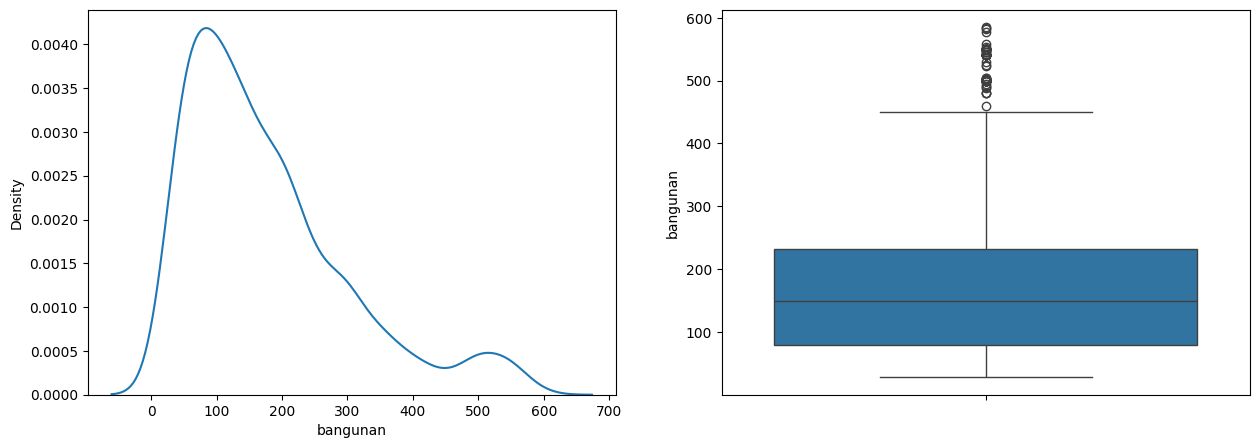

In [285]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(df['bangunan'])
plt.subplot(1,2,2)
sns.boxplot(df['bangunan'])
plt.show()

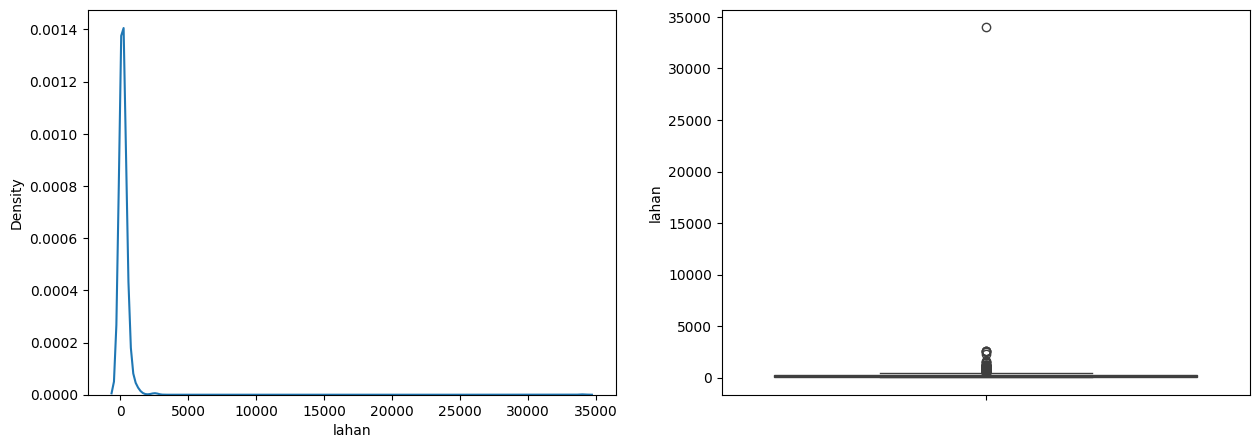

In [286]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(df['lahan'])
plt.subplot(1,2,2)
sns.boxplot(df['lahan'])
plt.show()

In [287]:
fig = px.scatter(df, x="lahan", y="harga",
                 title="Lahan dan Harga",
                color="harga"
                )
fig.show()

In [288]:
df[df['lahan']==34000]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband_wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j_walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
1230,Yogyakarta,9.950000e+09,4,550,34000.0,Yogyakarta,3,N,N,N,...,N,N,N,N,N,N,penginapan,premium,-7.801195,110.364917


In [289]:
idx = df[df['lahan'] == 34000 ].index
df = df.drop([1230])

In [290]:
df[df['lahan']>= 1500]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband_wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j_walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
266,Mergangsan,2.950000e+10,4,348,2540.0,"Mergangsan, Yogyakarta",3,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.814734,110.372558
503,Mantrijeron,3.800000e+10,8,500,1500.0,"Jalan Tirtodipuran, Mantrijeron Kel., Mantrije...",4,N,N,N,...,N,N,N,N,N,N,ruko,biasa,-7.818068,110.359723
580,Umbulharjo,3.400000e+10,6,500,2270.0,"Jl. Timoho No.70a, Muja Muju, Kec. Umbulharjo,...",3,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.814378,110.387374
1051,Yogyakarta,2.950000e+10,4,400,2600.0,Yogyakarta,6,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.801195,110.364917
1095,Kraton,6.500000e+09,7,500,1548.0,"Pakem, Sleman, Yogyakarta ...",7,N,N,N,...,N,Y,N,N,N,N,penginapan,biasa,-7.808799,110.362726
1186,Umbulharjo,4.000000e+10,4,300,1597.0,"Jl. Ipda Tut Harsono, Muja Muju, Kec. Umbulhar...",4,N,N,N,...,N,N,N,N,N,N,rumah biasa,premium,-7.814378,110.387374
1367,Yogyakarta,3.700000e+10,11,480,2581.0,Jl Arjuna ...,11,N,N,N,...,N,N,N,N,N,N,penginapan,biasa,-7.801195,110.364917
1373,Wirobrajan,3.700000e+10,10,480,2581.0,"Wirobrajan, Jl Arjuna ...",9,N,N,N,...,N,N,N,N,N,N,penginapan,biasa,-7.802624,110.350447


In [291]:
idx = df[df['lahan'] >= 1500 ].index
df = df.drop([266,503,580,1051,1095,1186,1367,1373])

In [292]:
df[df['lahan']>= 1400]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband_wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j_walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
287,Kotagede,2.700000e+09,3,105,1423.0,"Kotagede, Yogyakarta, Indonesia ...",3,N,N,Y,...,N,N,N,N,N,N,penginapan,biasa,-7.818311,110.397941


In [293]:
idx = df[df['lahan'] >= 1400 ].index
df = df.drop([287])

In [294]:
df[df['lahan']>=1000]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband_wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j_walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
9,Gondokusuman,1.300000e+10,7,80,1034.0,"Gondokusuman, Yogyakarta",2,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.786744,110.381000
221,Mantrijeron,8.900000e+09,10,350,1241.0,"Jalan Ngadinegaran, Mantrijeron Kel., Mantrije...",11,N,N,N,...,N,N,N,N,N,N,penginapan,biasa,-7.818068,110.359723
302,Umbulharjo,1.050000e+10,7,578,1140.0,"Jl. Timoho 42-32, Muja Muju, Kec. Umbulharjo, ...",4,N,N,N,...,N,N,N,N,N,N,rumah biasa,premium,-7.814378,110.387374
372,Umbulharjo,9.700000e+09,8,500,1140.0,Timoho Umbulharjo Yogyakarta ...,4,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.814378,110.387374
373,Pakualaman,2.500000e+10,4,500,1109.0,"Jalan Gajah Mada, Pakualaman, Yogyakarta, Indo...",2,N,N,N,...,N,N,N,N,N,N,rumah biasa,premium,-7.800434,110.376227
421,Umbulharjo,9.700000e+09,8,500,1140.0,"Umbulharjo, Yogyakarta",4,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.814378,110.387374
445,Mantrijeron,8.500000e+09,10,350,1241.0,"Jalan Mayjend Sutoyo, ...",10,N,N,N,...,N,N,N,N,N,N,penginapan,biasa,-7.818068,110.359723
605,Gondokusuman,5.500000e+09,10,80,1145.0,"Gondokusuman, Yogyakarta",6,N,N,N,...,N,N,N,N,N,N,kost,biasa,-7.786744,110.381000
712,Pakualaman,2.500000e+10,7,500,1109.0,"Pakualaman, Yogyakarta",3,N,N,Y,...,N,N,N,N,N,N,rumah biasa,biasa,-7.800434,110.376227
794,Mantrijeron,1.600000e+10,8,500,1088.0,"Mantrijeron, Yogyakarta",6,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.818068,110.359723


In [296]:
idx = df[df['lahan'] >= 1000 ].index
df = df.drop([9,221,302,372,373,421,445,605,712,794,856,1022,1080,1147,1161,1188,1218,1328,1356,1396,1489])

In [299]:
df[df['lahan']>=600]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband_wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j_walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
48,Gondokusuman,4.300000e+09,5,161,782.0,"Gondokusuman, Yogyakarta",2,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.786744,110.381000
87,Umbulharjo,1.600000e+10,8,300,851.0,"Umbulharjo, Yogyakarta",6,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.814378,110.387374
96,Mantrijeron,3.999000e+09,6,250,600.0,"Mantrijeron, Yogyakarta",8,N,N,N,...,N,N,N,N,N,N,penginapan,biasa,-7.818068,110.359723
161,Gondokusuman,9.000000e+09,5,400,600.0,"Gondokusuman, Yogyakarta",5,N,N,Y,...,N,N,N,N,N,N,kantor,biasa,-7.786744,110.381000
219,Mantrijeron,5.750000e+09,7,260,800.0,"Jalan Ngadinegaran, Mantrijeron Kel., Mantrije...",8,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.818068,110.359723
277,Tegalrejo,4.200000e+09,6,163,693.0,"Jalan Bener, Yogyakarta, 55243, Indonesia ...",3,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.780455,110.355073
456,Gondokusuman,5.000000e+09,10,300,635.0,"Gondokusuman, Yogyakarta",10,N,N,N,...,N,N,N,N,N,N,kost,biasa,-7.786744,110.381000
515,Mergangsan,6.500000e+09,4,350,722.0,"Jalan Taman Siswa, Yogyakarta, Indonesia ...",3,N,N,Y,...,N,Y,N,N,N,N,rumah biasa,biasa,-7.814734,110.372558
518,Tegalrejo,3.350000e+09,6,329,685.0,"Tegalrejo, Yogyakarta, Indonesia ...",7,N,N,Y,...,N,N,N,N,N,N,kost,biasa,-7.780455,110.355073
525,Pakualaman,1.500000e+10,8,350,684.0,"Pakualaman, Yogyakarta",6,Y,Y,Y,...,N,N,N,N,N,N,rumah biasa,premium,-7.800434,110.376227


In [300]:
idx = df[df['lahan'] >= 600 ].index
df = df.drop([48,87,96,161,219,277,456,515,518,525,537,606,622,639,657,671,694,711,720,767,779,797,798,801,813,814,821,827,855,904,938,1090,1145,1146,1152,1169,1170,1184,1209,1231,1293,1364,1377,1380,1389,1429,1459,1487,])

In [303]:
df[df['lahan']>=550]

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband_wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j_walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
781,Kotagede,6.500000e+09,10,492,580.0,"Kotagede, Yogyakarta",9,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.818311,110.397941
964,Yogyakarta,1.900000e+09,3,162,550.0,"Wonosalam, Sukoharjo, Ngaglik Sleman ...",2,N,N,Y,...,N,N,N,N,N,N,rumah biasa,biasa,-7.801195,110.364917
1020,Gondokusuman,7.900000e+09,7,270,599.0,"Gondokusuman, Yogyakarta",4,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.786744,110.381000
1259,Kraton,6.000000e+09,2,585,585.0,"Kraton, Yogyakarta",7,N,N,N,...,N,Y,N,N,N,N,kost,biasa,-7.808799,110.362726
1300,Wirobrajan,4.500000e+09,7,400,581.0,"Jalan Kapten Pierre Tendean, Wirobrajan Kel., ...",3,N,N,N,...,N,N,N,N,N,N,rumah biasa,biasa,-7.802624,110.350447


In [304]:
idx = df[df['lahan'] >= 600 ].index
df = df.drop([781,964,1020,1259,1300])

In [305]:
fig = px.scatter(df, x="lahan", y="harga",
                 title="Lahan dan Harga",
                color="harga"
                )
fig.show()

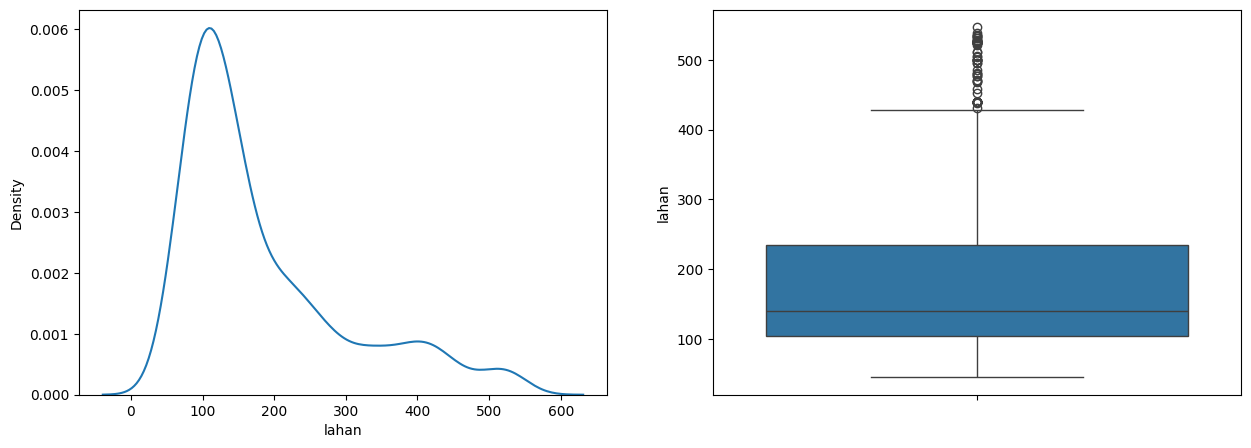

In [306]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(df['lahan'])
plt.subplot(1,2,2)
sns.boxplot(df['lahan'])
plt.show()

In [307]:
loc_mean = df.groupby('lokasi')['harga'].mean().reset_index().sort_values(by='harga',ascending=True)

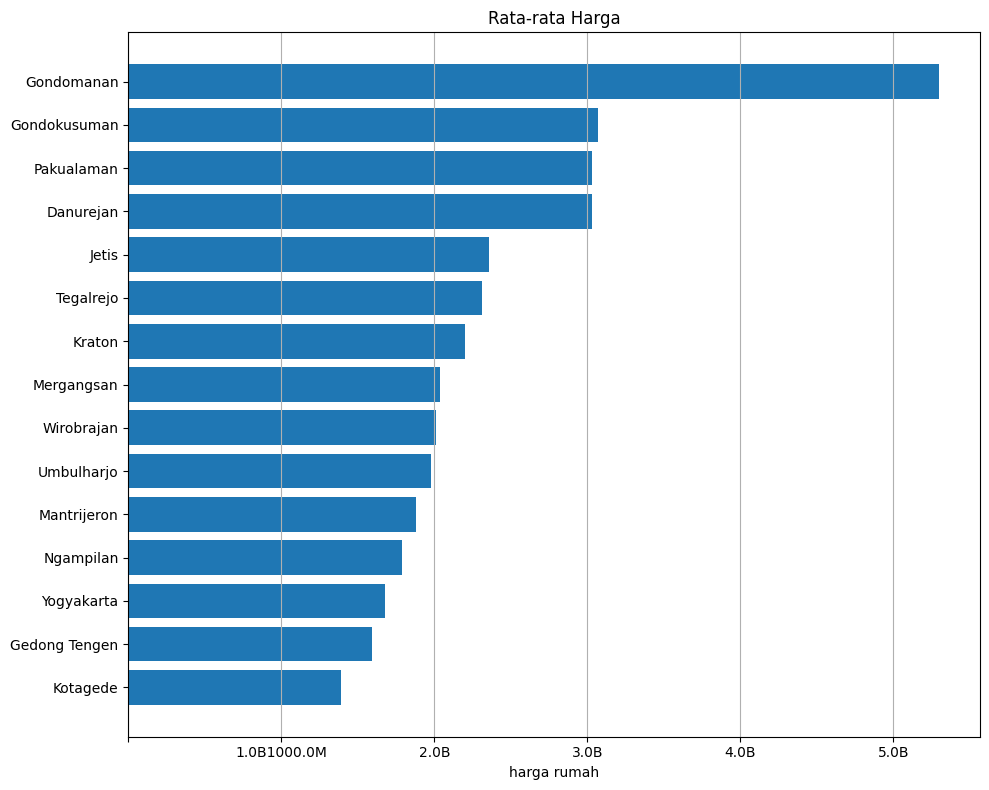

In [308]:
plt.figure(figsize=(10,8))
plt.barh(loc_mean['lokasi'],loc_mean['harga'])
plt.title('Rata-rata Harga')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_price))
plt.xlabel('harga rumah')
plt.ylabel('')
plt.grid(axis='x')
labels,location = plt.xticks()
plt.tight_layout()
plt.show()

In [309]:
lokasi_harga_mean = df.groupby(['lokasi', 'alamat'])['harga'].mean().reset_index()
lokasi_harga_top10 = lokasi_harga_mean.head(10)
lokasi_harga_top10_sorted = lokasi_harga_top10.sort_values(by='harga', ascending=False)

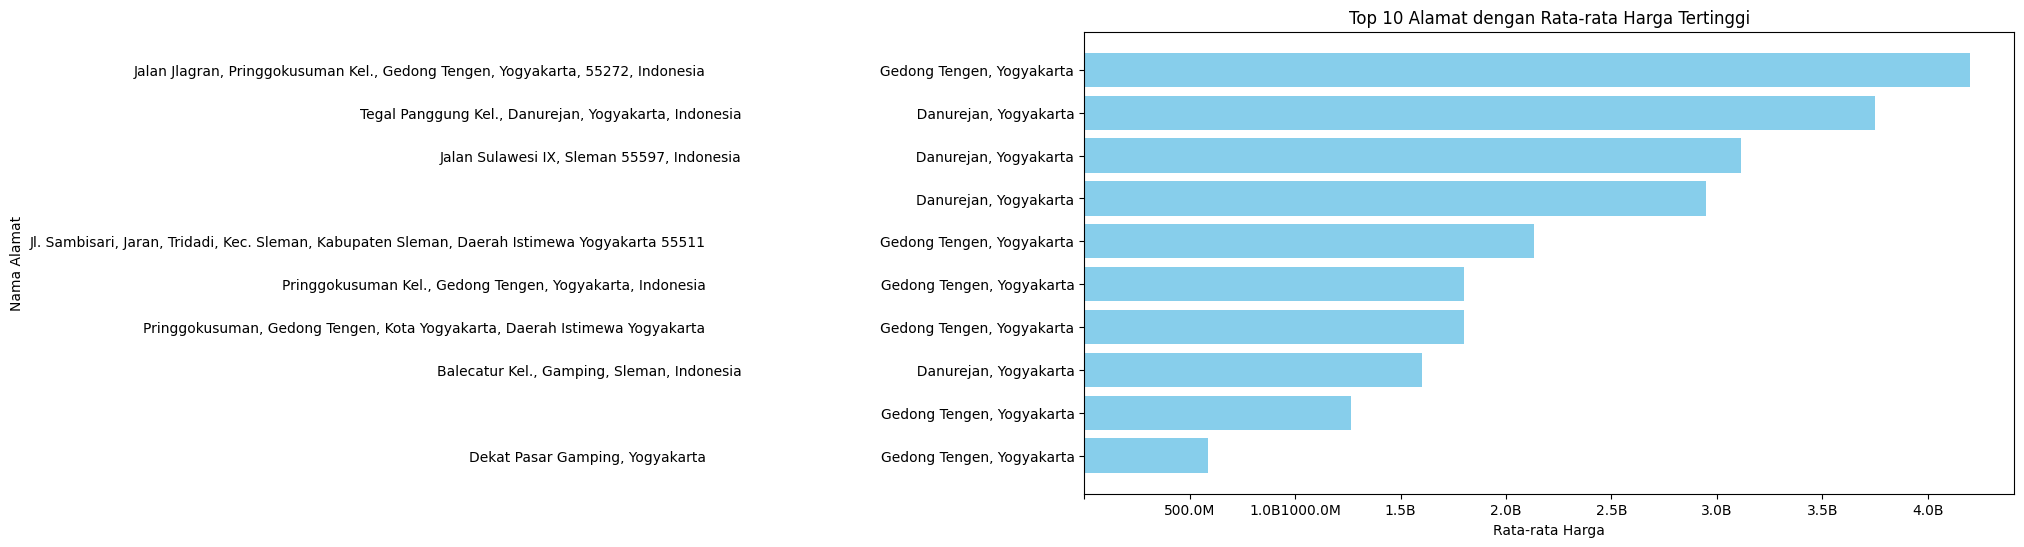

In [310]:
plt.figure(figsize=(12, 6))
plt.barh(lokasi_harga_top10_sorted['alamat'], lokasi_harga_top10_sorted['harga'], color='skyblue')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_price))
plt.xlabel('Rata-rata Harga')
plt.ylabel('Nama Alamat')
plt.ylim(reversed(plt.ylim()))  # Membalik urutan pada sumbu y
plt.title('Top 10 Alamat dengan Rata-rata Harga Tertinggi')
plt.show()

In [311]:
import numpy as np

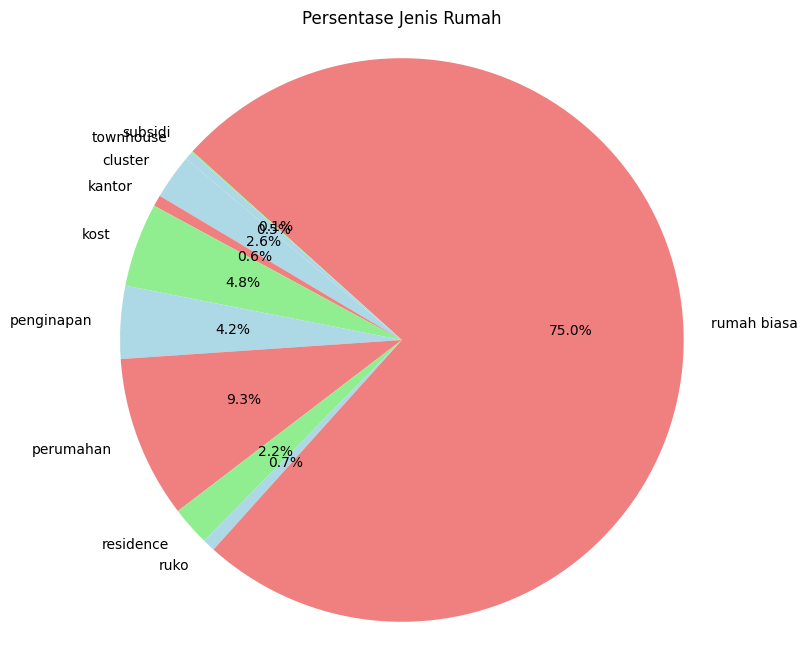

In [312]:
# Menghitung jumlah setiap jenis rumah
jenis_rumah_counts = dict(zip(*np.unique(df['jenis_rumah'], return_counts=True)))

# Menyiapkan data untuk visualisasi
labels = list(jenis_rumah_counts.keys())
values = list(jenis_rumah_counts.values())

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.title('Persentase Jenis Rumah')
plt.show()

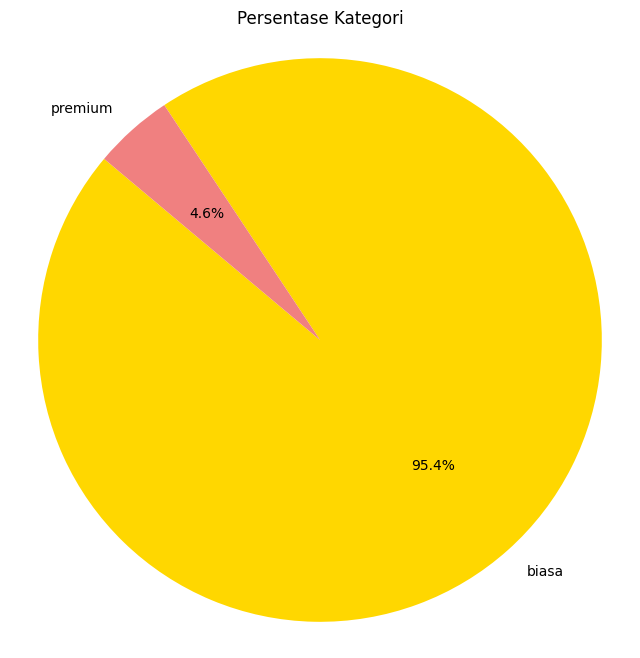

In [313]:
# Menghitung jumlah setiap kategori
kategori_counts = dict(zip(*np.unique(df['kategori'], return_counts=True)))

# Menyiapkan data untuk visualisasi
labels = list(kategori_counts.keys())
values = list(kategori_counts.values())

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral'])
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.title('Persentase Kategori')
plt.show()

In [314]:
data =  df.drop(['latitude','longitude'],axis=1)

<ipython-input-315-a17a103adfd3>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



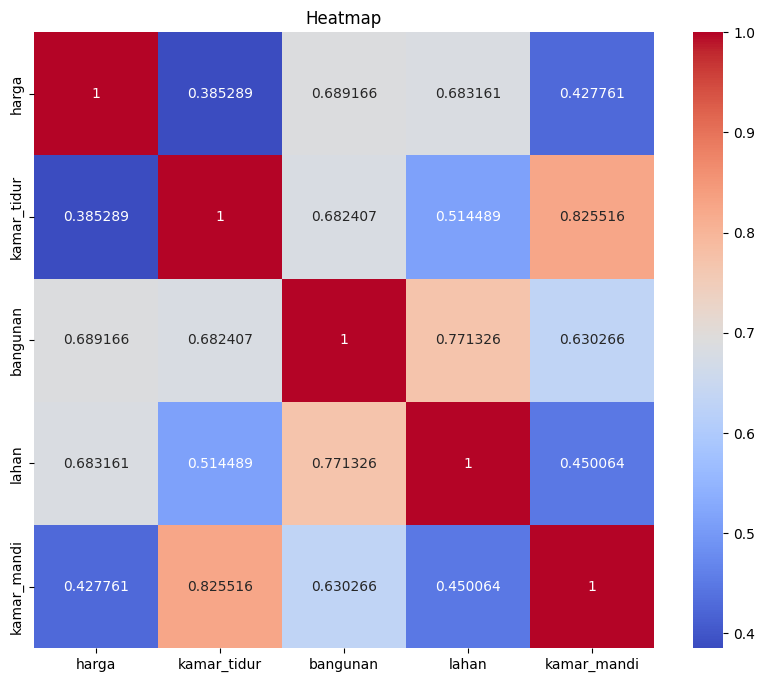

In [315]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='g')
plt.title('Heatmap')
plt.show()

In [316]:
df = df.reset_index(drop=True)
df.head()

,lokasi,harga,kamar_tidur,bangunan,lahan,alamat,kamar_mandi,sistem_alarm,gym,internet_broadband_wifi,...,universitas_islam_negeri_sunan_kalijaga,gereja_saint_francis_xaverius_yogyakarta,sahid_j_walk,rumah_sakit_panti_rapih,universitas_sanata_dharma_yogyakarta,sman_3_yogyakarta,jenis_rumah,kategori,latitude,longitude
0,Yogyakarta,8.250000e+08,2,40,66.0,Yogyakarta,2,N,N,N,...,N,N,N,N,N,N,rumah biasa,premium,-7.801195,110.364917
1,Jetis,1.680000e+09,4,140,500.0,"Jetis, Yogyakarta",5,N,N,N,...,N,N,N,N,N,N,rumah biasa,premium,-8.035127,110.490835
2,Yogyakarta,9.300000e+08,2,66,92.0,"Jalan Gedongan Kuning Selatan, Purbayan Kel., ...",2,N,N,N,...,N,N,N,N,N,N,rumah biasa,premium,-7.801195,110.364917
3,Mergangsan,4.500000e+09,4,350,230.0,jalan parangtritis jogja ...,4,Y,Y,Y,...,N,N,N,N,N,N,residence,premium,-7.814734,110.372558
4,Kraton,1.300000e+09,3,90,100.0,"Kraton, Yogyakarta",1,N,N,N,...,N,Y,N,N,N,N,rumah biasa,biasa,-7.808799,110.362726


In [317]:
df.describe()

,harga,kamar_tidur,bangunan,lahan,kamar_mandi,latitude,longitude
count,1.247000e+03,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000
mean,1.999992e+09,4.141941,165.226143,184.461909,2.894146,-7.813855,110.376864
std,1.841750e+09,2.143690,115.304191,116.838950,1.931414,0.040465,0.025446
min,1.189210e+08,1.000000,28.000000,45.000000,1.000000,-8.035127,110.350447
25%,8.475000e+08,3.000000,80.000000,104.000000,2.000000,-7.818068,110.359723
50%,1.500000e+09,4.000000,140.000000,140.000000,2.000000,-7.814378,110.372558
75%,2.575000e+09,5.000000,216.000000,234.500000,4.000000,-7.801195,110.387374
max,2.350000e+10,15.000000,584.000000,547.000000,12.000000,-7.780455,110.490835


In [318]:
df.to_csv('jogja___.csv')